# Group16_Batch1

# Domain : Tourism
## Dataset used : hotel_bookings.csv

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

#### Suppressing warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

##### Read the dataset to python environment

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
df =pd.read_csv('/content/gdrive/My Drive/Group16_Batch1/hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.shape

(119390, 32)

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 
                     'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


## Findings :

#### The given dataset is having 119390 rows and 32 columns. 
#### The below columns are having null values :
#### children : 4
#### country : 488
#### agent : 16340
#### company : 112593
#### We will handle these null values during pre-processing.

# Exploratory Data Analysis (EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59fe987e90>,
      dtype=object)

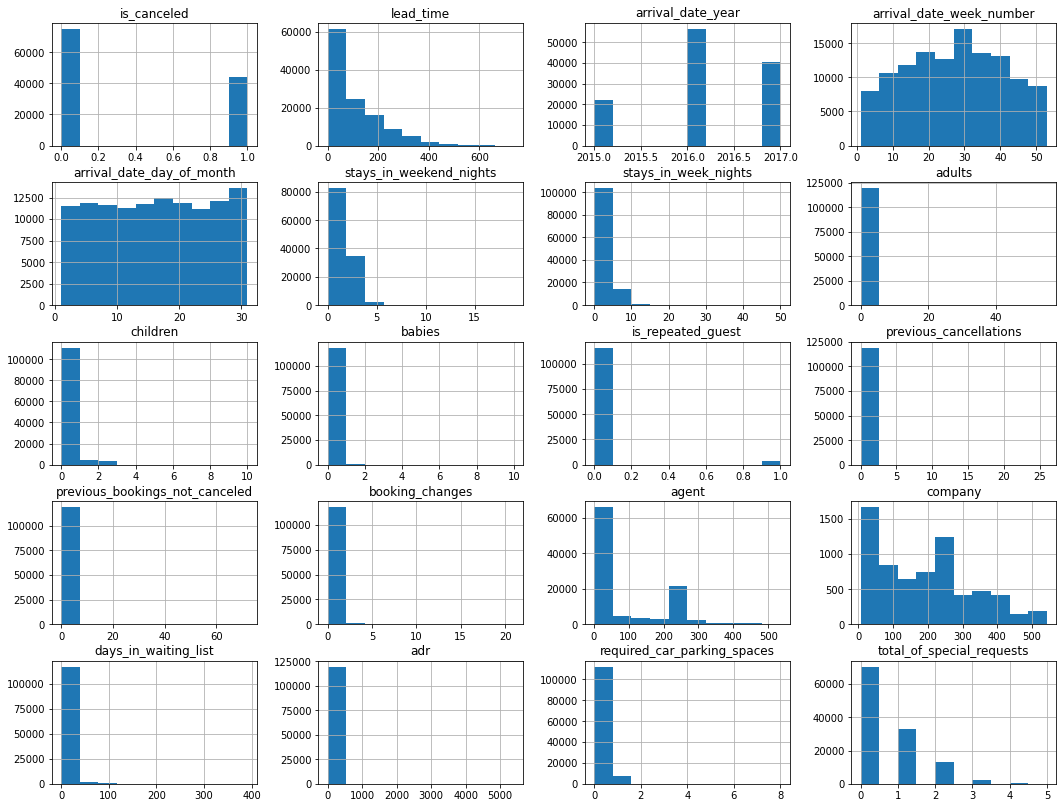

In [10]:
# plotting histograms

df.hist(figsize=(18, 14))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text major ticklabel objects>)

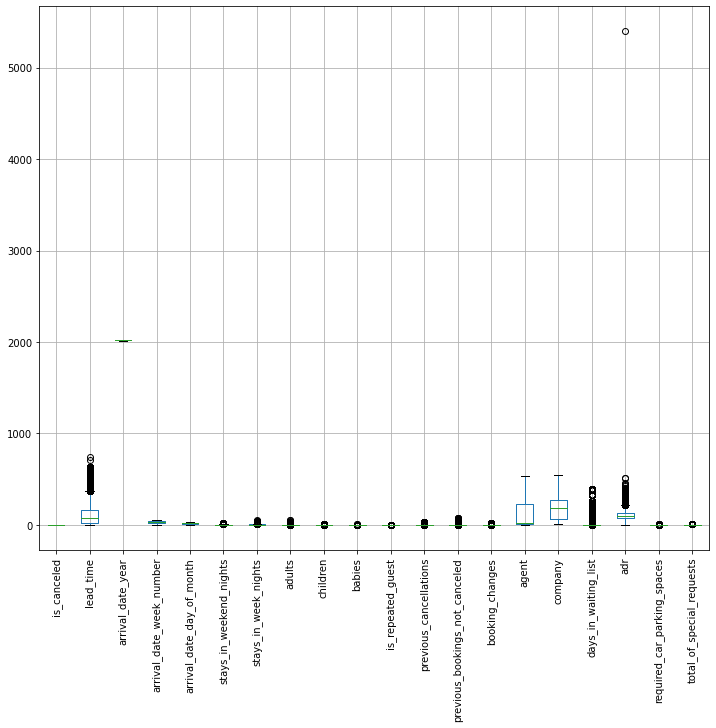

In [11]:
# plotting boxplots

plt.figure(figsize=(12, 10))
df.boxplot()
plt.xticks(rotation=90) 

##### Here, we have plotted the boxplots. From this, we will be able to detect the outliers in the given dataset. We will handle these outliers during pre-processing.

## Hotel Types

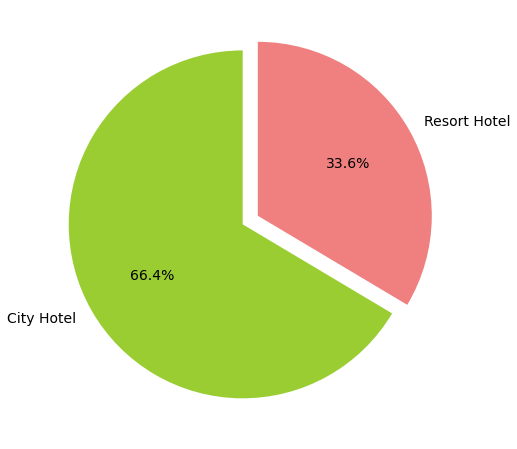

In [12]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

#### It seems that a huge proportion of choice of hotels was City hotel. Resort hotel tend to be on the expensive side and most people will just stick with City hotel.
#### Also, resort hotels tend to be appropriate for larger group of people.  
#### Let's have an overview of the number of people who booked the hotel.

In [13]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [14]:
# Looking into children. 
# Using groupby to group according to hotel types only.
df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


#### It seems that mean values for adults and children are higher in the case of Resort Hotel. This means that Resort hotel is the better choice for large families.

### Booking cancellations

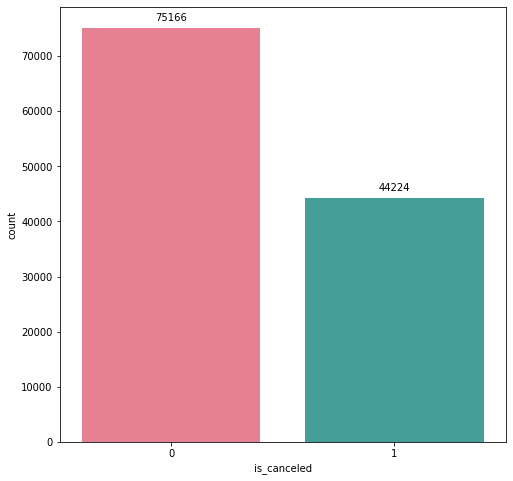

In [15]:
#Canceled=1, Not canceled=0
canceled_data = df['is_canceled']
ax=sns.countplot(canceled_data, palette='husl')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

#### Majority of bookings were not canceled, still some half of the bookings were canceled.

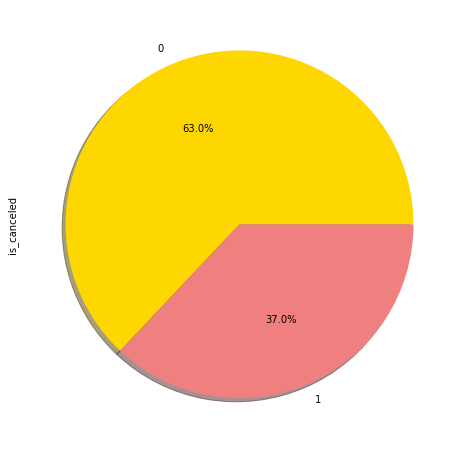

In [16]:
cols = ['gold', 'lightcoral']
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

#### According to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled.

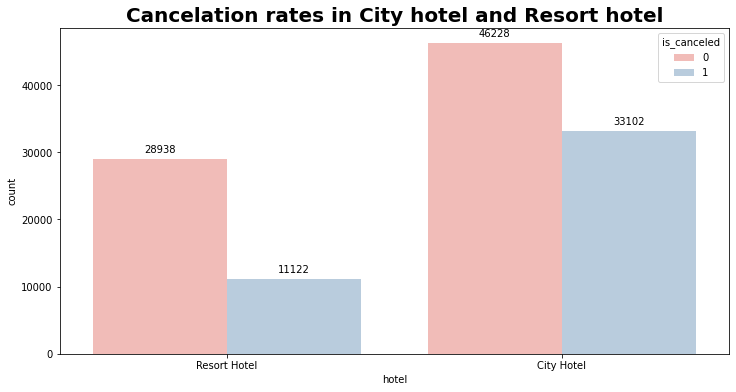

In [17]:
plt.figure(figsize=(12, 6))

ax=sns.countplot(x='hotel',hue="is_canceled", data=df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

###### We have seen a huge proportion of cancellation from City hotel. This was expected since 3/4 of the hotel bookings belong to City hotel.

Text(0.5, 1.0, 'Arriving year, LeadTime and Cancelations')

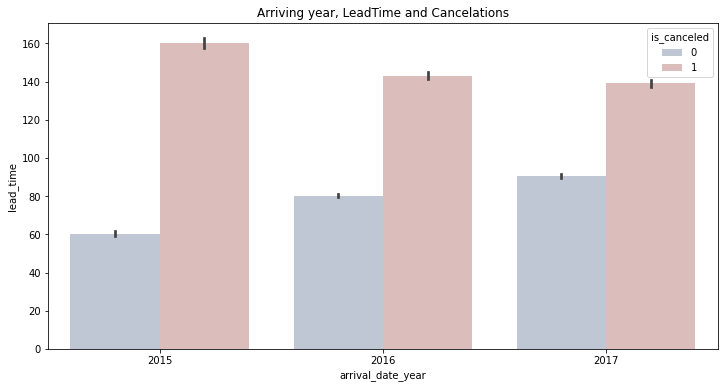

In [18]:
# Cancellation rate based on lead_time vs arrival_date_year

plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= df, palette='vlag')
plt.title('Arriving year, LeadTime and Cancelations')

#### For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

## Country of visitors

In [19]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [20]:
import folium
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

#### More visitors are from western europe, namely France, UK, and Portugal being the highest.
#### We can instruct the marketing team to target people of this region.

## Arrivals in month and year

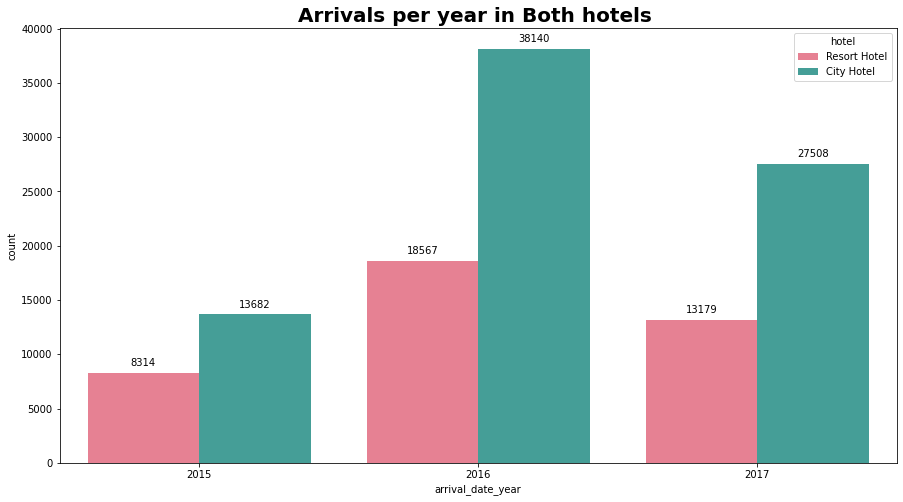

In [21]:
plt.figure(figsize=(15, 8))
ax=sns.countplot(x='arrival_date_year',hue='hotel', data=df, palette='husl')
plt.title("Arrivals per year in Both hotels ", fontweight="bold", size=20)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

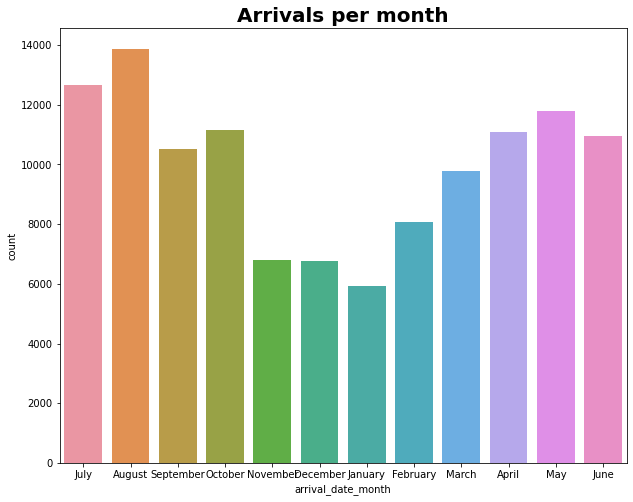

In [22]:
plt.figure(figsize=(5, 8))
sns.countplot(data = df, x = 'arrival_date_month')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

#### We can see highest number of the bookings were in the year 2016 and bookings were majorly in City hotel.
#### Most bookings were done in the months of April, May, June, July, and August.

## Arrival Date

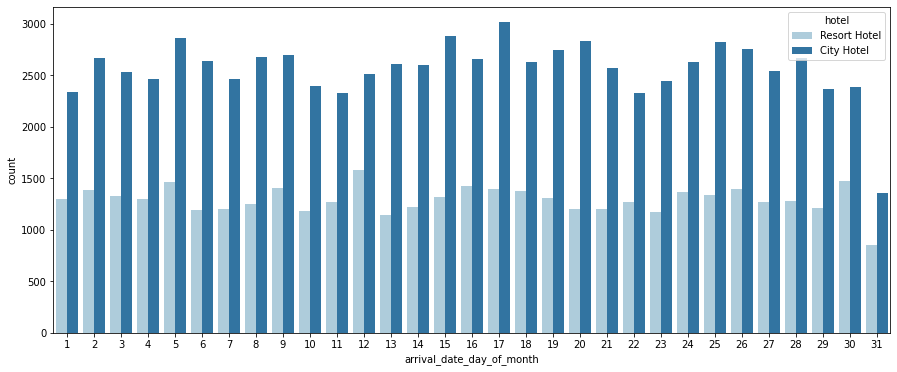

In [23]:
plt.figure(figsize=(15,6))

sns.countplot(data = df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

#### Month end day has very less arrival count when compared to the other days.
#### Majority of the bookings are in City hotel.

## Weekend Stay

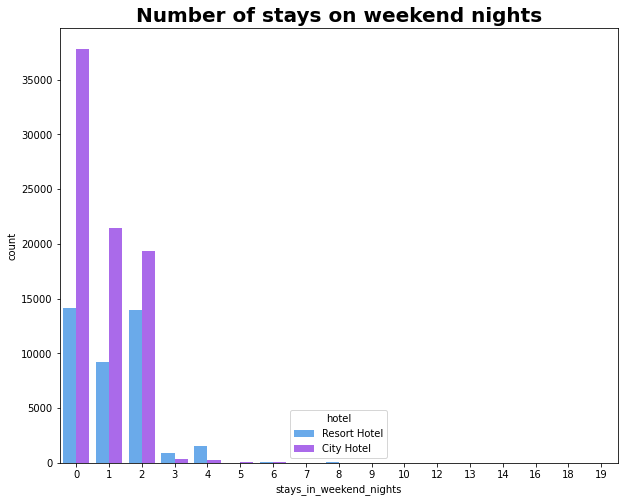

In [24]:
plt.figure(figsize=(10, 8))
sns.countplot(x='stays_in_weekend_nights', hue='hotel', data=df, palette='cool')
plt.title("Number of stays on weekend nights", fontweight="bold", size=20)
plt.show()

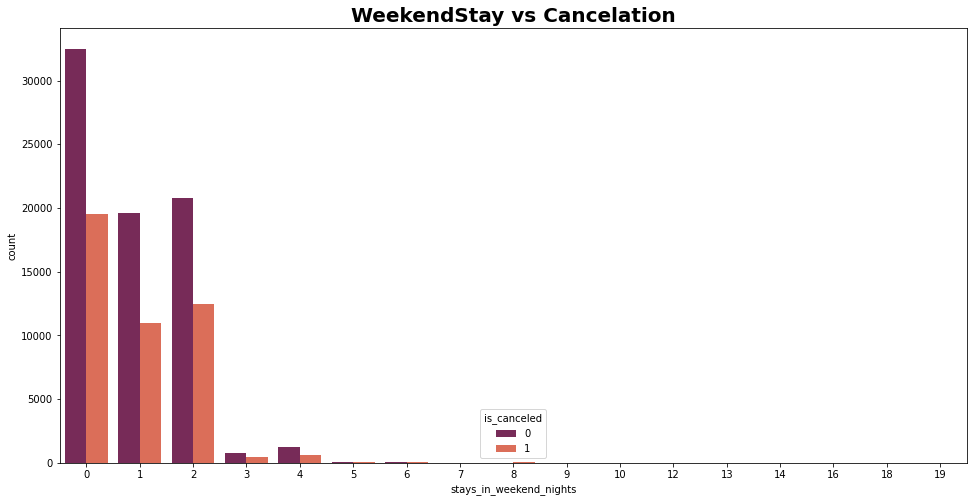

In [25]:
plt.figure(figsize=(8, 8))
sns.countplot(data = df, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation', fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

#### In the first graph, we can see that most of the weekend nights were booked in City Hotel.
#### The second plot shows that most of weekend nights which were booked were not canceled.

## Week Stay

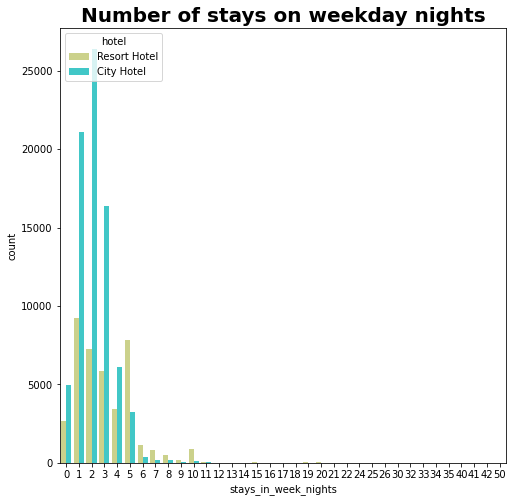

In [26]:
plt.figure(figsize=(8, 8))
sns.countplot(x='stays_in_week_nights',hue='hotel', data=df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.show()

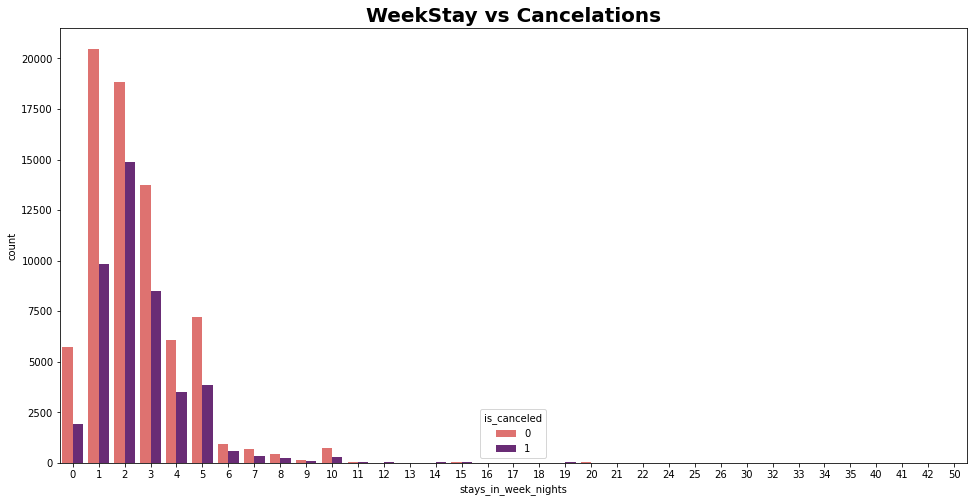

In [27]:
plt.figure(figsize=(8, 8))
sns.countplot(data = df, x = 'stays_in_week_nights', hue='is_canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

#### From the first graph, it can be seen that the weekday night stays were more in City Hotel.
#### From the second graph it can be seen that for the booked weekday stays, the cancellation rates are low .

# Cancellation across hotels in different months

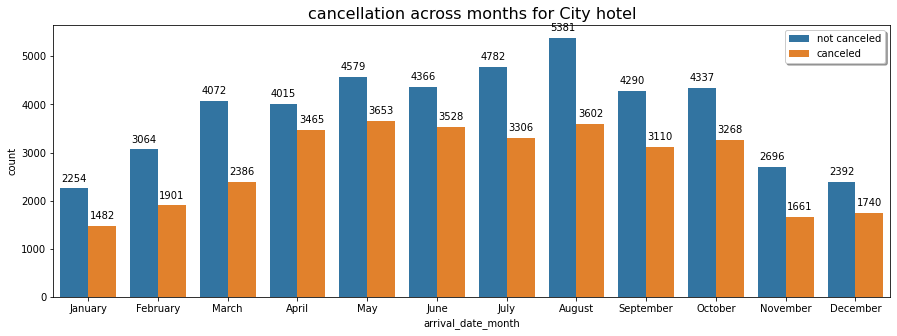

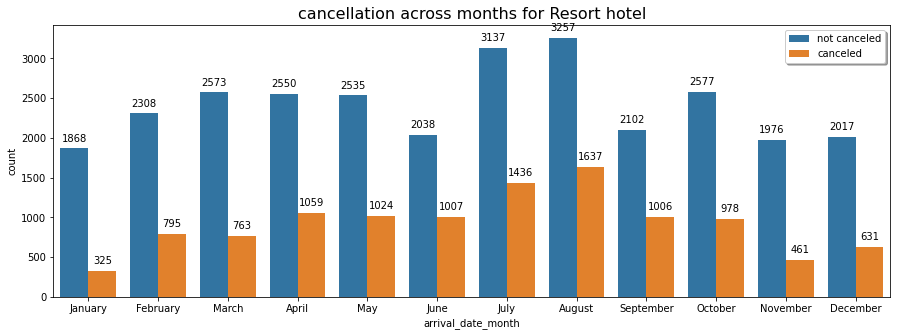

In [28]:
#for city hotel
plt.figure(figsize=(15,5))
filter = df['hotel'] == 'City Hotel'
data = df[filter]
ax = sns.countplot(data=data,x='arrival_date_month',hue='is_canceled',order=['January','February','March','April','May','June','July','August','September','October','November','December'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("cancellation across months for City hotel",fontsize=16)
plt.legend(['not canceled','canceled'],shadow=True,loc=0)
plt.show()

#for resort hotel
plt.figure(figsize=(15,5))
filter = df['hotel'] == 'Resort Hotel'
data = df[filter]
ax = sns.countplot(data=data,x='arrival_date_month',hue='is_canceled',order=['January','February','March','April','May','June','July','August','September','October','November','December'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("cancellation across months for Resort hotel",fontsize=16)
plt.legend(['not canceled','canceled'],shadow=True,loc=0)
plt.show()

#### From the above two graphs its clear that the average cancellation is more in City hotel than in Resort hotel,which is an important factor in prediction.

## Category of Visitor

Text(0.5, 0.98, 'People distribution')

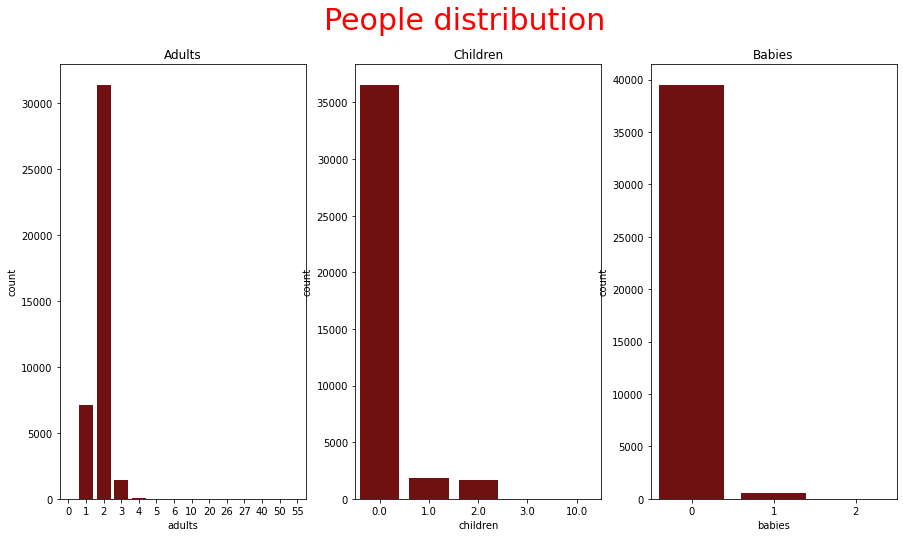

In [29]:
family=['adults','children','babies']
fig,ax=plt.subplots(1,3,figsize=(15,8))

for i,f in enumerate(family):
    fig.sca(ax[i])
    sns.countplot(data=data,x=f,color='maroon')
    plt.title(f'{f.title()}')
fig.suptitle('People distribution',fontsize=30,color='red')

#### It seems that majority of the visitors travel in pair. Those who travel with children or babies have no specific preference for the type of hotel.

# Market Segments and Distribution Channels

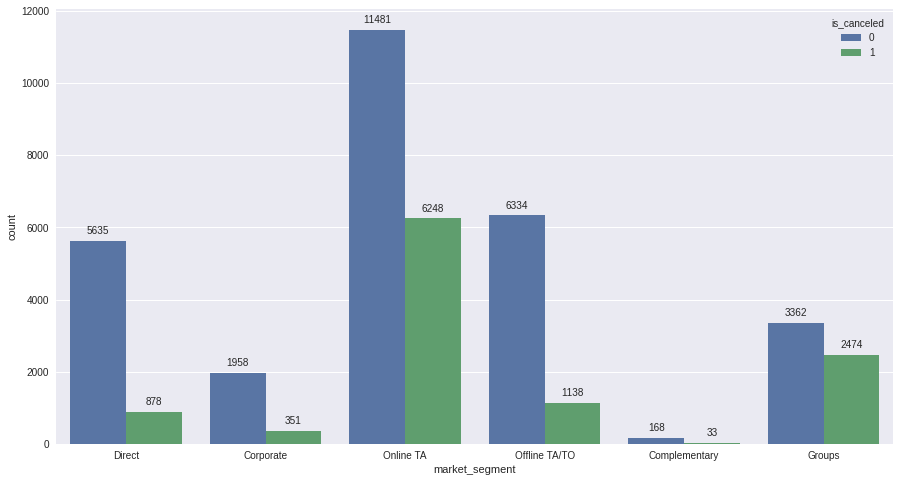

In [30]:
plt.figure(figsize=(15, 8))
plt.style.use("seaborn")
ax = sns.countplot(data=data,x='market_segment',hue='is_canceled')
#ax = sns.countplot(x="market_segment", hue="is_canceled", data=data)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [31]:
df.distribution_channel.value_counts(normalize=True)

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

Text(0.5, 1.0, 'Types of distribution channel')

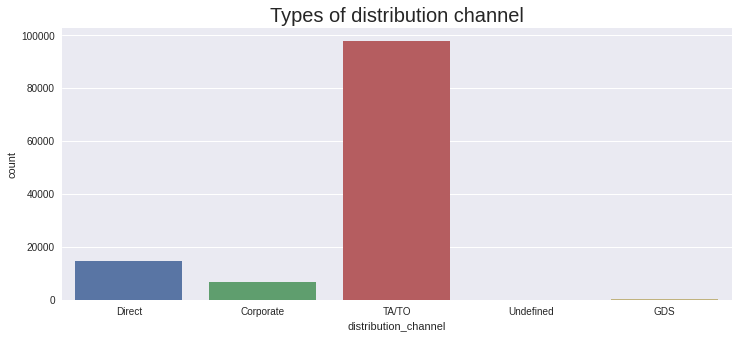

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

#### Majority of the distribution channels and market segments involve travel agencies (online or offline).
#### We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

### Deposit Type

In [33]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

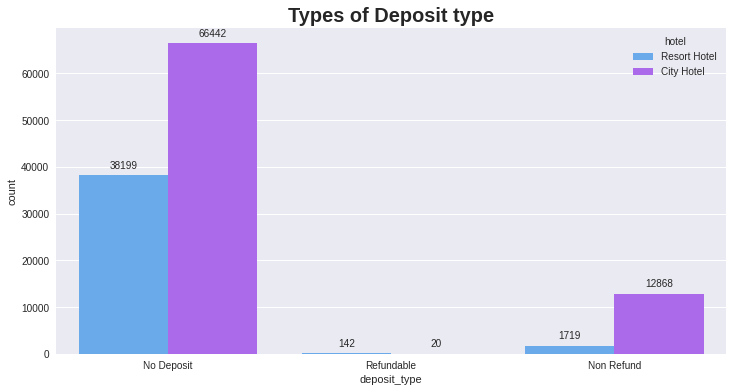

In [34]:
plt.figure(figsize=(12, 6))

ax=sns.countplot(data = df, x = 'deposit_type',hue='hotel', palette='cool')
plt.title('Types of Deposit type', fontweight="bold", size=20)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

#### There were no deposit for City Hotel whereas Resort Hotel had some deposits. No deposit may lead to the cancellation of the bookings.

## Guest Repetition

In [35]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

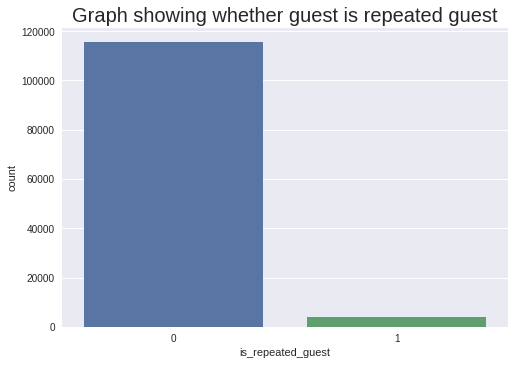

In [36]:
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

#### Extremely low count of repeated guests. This needs to be investigated further to find the reason for having low count of repeated guests.
#### A need to target repeated guests since they have booked before.

## Types of Guests

In [37]:
df.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

Text(0.5, 1.0, 'Graph showing type of guest')

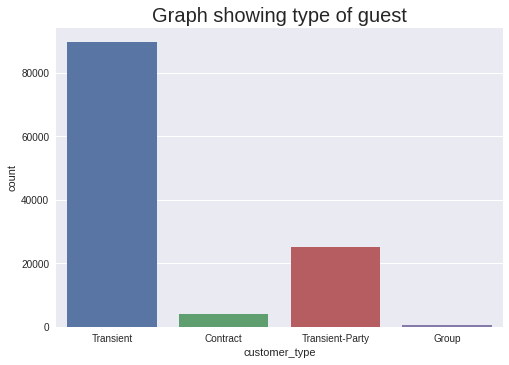

In [38]:
sns.countplot(data = df, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

#### Majority of the bookings are transient. This means that the booking is not part of a group or contract. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response for their bookings.

# Average Daily Rate (ADR) year-wise (Bi-variate Analysis)

Text(0, 0.5, 'adr')

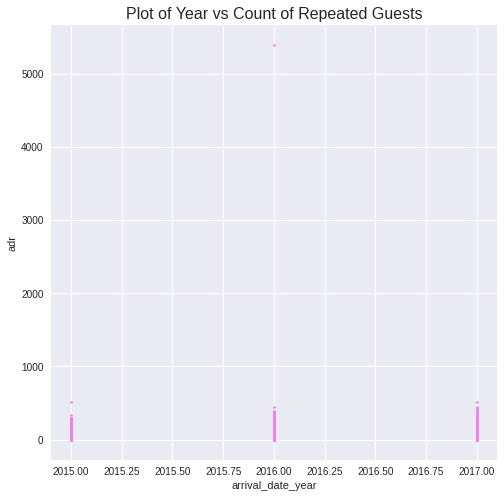

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(df['arrival_date_year'], df['adr'], s=5, c='violet')
plt.title('Plot of Year vs Count of Repeated Guests', fontsize = 16)
plt.xlabel('arrival_date_year')
plt.ylabel('adr')

#### From the above graph, it is evident that there is an increase in ADR from 2015 to 2017.

# Average Daily Rate (ADR) month-wise

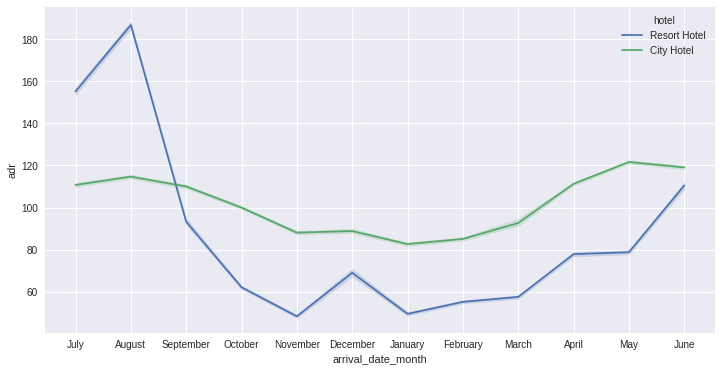

In [40]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

### For Resort hotel, the average daily rate is more expensive during July, August, and September.
#### For City hotel, the average daily rate is more expensive during May, June, July, and August.
#### It seems like the hotels are more expensive in the months of July and August.

## Insights :

#### By performing EDA on the given dataset, we have found the below insights :
#### Almost 35% of bookings were canceled. Need to find ways to reduce the cancellation rates.
#### Majority of the hotels booked are City hotel. Definitely need to spend the most targeting fund on that hotel.
#### Most bookings were made from July to August. And the least bookings were made at the start and end of the year. We should target these months. Those are peak months due to the summer period.
#### Portugal, the UK, France, Spain and Germany are the top countries from where most of the guests come with more than 80% of total guests coming from these 5 countries. That is, majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
#### We also realise that the high rate of cancellations can be due high no deposit policies. This needs to be amended.
#### Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

### Strategies to counter high cancellation rate at the hotels :
#### Set non-refundable rates, collect deposits, and implement more rigid cancellation policies.
#### Encourage direct bookings by offering special discounts.
#### Monitor where the cancellations are coming from such as Market Segments, Distribution Channels, etc.,